This notebook will do the telescope comparison analyses. It will reproduce Figure 10 in the NANOGrav 15-year GWB paper.

You will need to download the data from Google drive:
* https://drive.google.com/file/d/1vB6U0V9E5ETyPbWvwJUe_aqNEgxfC6XU/view?usp=sharing: Unpack the file `psd_pl_posteriors.tar.gz` and then load the posteriors from `curn_variedgamma.h5`
* https://drive.google.com/file/d/1keklHY52MV38BXF3dIqzumjKo2mdB9I_/view?usp=sharing: Unpack the file `compare_telescopes.tar.gz` and then load the posteriors from `curn_variedgamma_ao.h5` and `curn_variedgamma_gb.h5`.

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from chainconsumer import ChainConsumer

%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
with open('../ng15_rcparams.json', 'rb') as f:
    plt.rcParams.update(json.load(f))
plt.rcParams['text.latex.preamble'] = (
    r'\usepackage{amsmath}'
    r'\usepackage{amsbsy}'
    r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
)

In [6]:
chaindir = './'

chain = pd.read_hdf(chaindir + 'curn_variedgamma.h5')
chain_ao = pd.read_hdf(chaindir + 'compare_telescopes/' + 'curn_variedgamma_ao.h5')
chain_gb = pd.read_hdf(chaindir + 'compare_telescopes/' + 'curn_variedgamma_gb.h5')

In [7]:
def get_posterior_samples(chain, params, burn):
    
    idx = [list(chain.columns).index(p) for p in params]
    
    return chain.values[burn:, idx]

In [8]:
burn = 50000
labels = [r'$\gamma_\mathrm{CURN}$', r'$\log_{10}A_\mathrm{CURN}$']

c = ChainConsumer()
c.add_chain(get_posterior_samples(chain, ['gw_crn_gamma', 'gw_crn_log10_A'], burn), 
            weights=None, parameters=labels, zorder=1, name='Entire PTA')

c.add_chain(get_posterior_samples(chain_ao, ['gw_gamma', 'gw_log10_A'], burn), 
            weights=None, parameters=labels, zorder=2, name='AO only')

c.add_chain(get_posterior_samples(chain_gb, ['gw_gamma', 'gw_log10_A'], burn), 
            weights=None, parameters=labels, zorder=2, name='GBT only')

In [9]:
c.configure(usetex=True, 
            bar_shade=[False, False, False],
            colors=['blue', 'orange', 'green'],
           linestyles=['solid', 'solid', 'solid'],
           linewidths=[1.0, 1.5, 1.5],
           shade=[True, False, False], 
            shade_alpha=[0.05, 0, 0],
            summary=False,
            diagonal_tick_labels=True,
           legend_kwargs={'loc':'lower left', 'handlelength':0, 'markerfirst':True, 'fontsize':'small'},
           sigmas=[0,1,2,3])

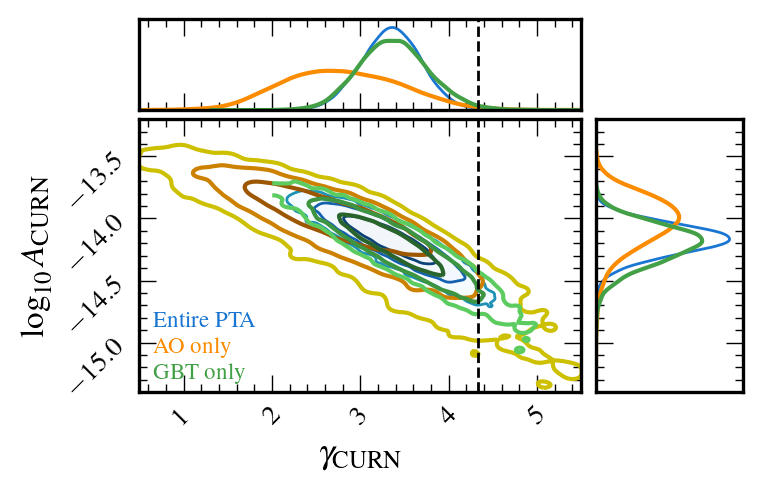

In [10]:
fig = c.plotter.plot(truth=[4.333,-12], figsize=plt.rcParams['figure.figsize'])
fig.axes[2].minorticks_on()
fig.axes[2].tick_params(which='both',direction='in',tick2On=True)
fig.axes[2].set_ylim((-15.4,-13.2))
fig.axes[2].set_xlim((0.5,5.5))
#fig.axes[2].vlines(13./3.,-15,-13.4,ls='dashed',color='k')
#fig.axes[2].legend()

fig.axes[0].set_xlim(fig.axes[2].get_xlim())
fig.axes[0].tick_params(which='both',direction='in',top=True,labeltop=False,bottom=True,labelbottom=False)
fig.axes[0].set_xticks([1, 2, 3, 4, 5])
fig.axes[0].minorticks_on()

fig.axes[3].set_ylim(fig.axes[2].get_ylim())
fig.axes[3].set_yticks([-15, -14.5, -14, -13.5])
fig.axes[3].minorticks_on()
fig.axes[3].tick_params(which='both',direction='in',left=True,labelleft=False,right=True,labelright=False)

plt.show()
# plt.savefig('telescope_comparison_psd.pdf', bbox_inches='tight', dpi=400)